In [239]:
!pip install deepface ultralytics faiss-cpu pandas

In [240]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import random

import numpy as np
import faiss

In [241]:
model_name = "Facenet" 
detector_backend = "opencv"
num_dimensions = 128 # Facenet output

In [242]:
representations = []

# Inisialisasi DataFrame Pandas untuk menyimpan nama orang dan embedding
df = pd.DataFrame(columns=["name", "embedding"])

# Dictionary untuk mapping file_name ke nama orang
file_to_name = {
    "img5.jpg" : "Angelina Jolie",
    "img6.jpg" : "Angelina Jolie",
    "img14.jpg" : "Mark Zuckerberg",
    "img15.jpg" : "Mark Zuckerberg",
    "img17.jpg" : "Jack Dorsey",
    "img54.jpg" : "Jennifer Aniston",
    "img56.jpg" : "Jennifer Aniston",
    "img62.jpg" : "Jack Dorsey"
}

for r, d, files in os.walk("../Belajar-DeepFace"):
    for file in files:
        if ".jpg" in file:
            exact_file = f"{r}/{file}"
            objs = DeepFace.represent(
                img_path=exact_file,
                model_name=model_name,
                detector_backend=detector_backend
            )
            
            # Dapatkan nama orang dari dictionary
            name = file_to_name.get(file, "Unknown")  # Jika file tidak ada dalam dictionary, beri nama 'Unknown'
            
            for obj in objs:
                embedding = obj["embedding"]
                representations.append([file, embedding])
                
                # Buat DataFrame baru dari nama dan embedding yang dihasilkan
                new_row = pd.DataFrame({"name": [name], "embedding": [embedding]})
                
                # Gabungkan DataFrame baru ke DataFrame utama menggunakan pd.concat()
                df = pd.concat([df, new_row], ignore_index=True)

In [243]:
# number of dimension
for obj in objs:
    print(len(obj["embedding"]))

128


In [244]:
print(df)

               name                                          embedding
0   Mark Zuckerberg  [-1.1351804733276367, -0.8694196939468384, -1....
1   Mark Zuckerberg  [-1.1018025875091553, -0.8272180557250977, -1....
2       Jack Dorsey  [-0.9749081134796143, -0.7117679119110107, -1....
3    Angelina Jolie  [-0.9477615356445312, 0.3950583338737488, 1.10...
4  Jennifer Aniston  [-1.1367212533950806, 0.8382776975631714, -0.7...
5  Jennifer Aniston  [-0.2428610920906067, 1.451387643814087, -0.28...
6    Angelina Jolie  [-0.12287281453609467, 1.0534143447875977, 1.5...
7       Jack Dorsey  [-0.9425899982452393, -1.3567513227462769, -0....


In [245]:
# Simpan DataFrame ke CSV jika diperlukan
df.to_csv("face_embeddings.csv", index=False)

In [246]:
print(f"deepface unit test items have {len(representations)} images")

deepface unit test items have 8 images


In [247]:
embeddings = []
for key, value in representations:
    embeddings.append(value)

In [248]:
# euclidean
tic = time.time()
index = faiss.IndexFlatL2(num_dimensions)
toc = time.time()
print(f"faiss instance is initialized in {toc-tic} seconds")

faiss instance is initialized in 0.01113748550415039 seconds


In [249]:
tic = time.time()
index.add(np.array(embeddings, dtype = "f"))
toc = time.time()
print(f"{len(embeddings)} vectors stored in faiss intance in {toc-tic} seconds")

8 vectors stored in faiss intance in 0.004981040954589844 seconds


In [250]:
target_path = "../Target/img13.jpg"

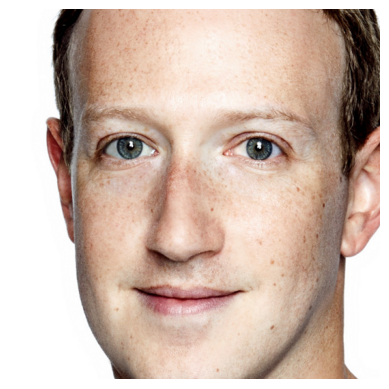

In [251]:
target_img = DeepFace.extract_faces(
    img_path = target_path, 
    detector_backend=detector_backend
)[0]["face"]
plt.imshow(target_img)
plt.axis("off")
plt.show()

In [252]:
target_embedding = DeepFace.represent(
    img_path=target_path,
    model_name=model_name,
    detector_backend=detector_backend
)[0]["embedding"]

In [253]:
target_embedding = np.array(target_embedding, dtype = "f")

In [254]:
target_embedding = np.expand_dims(target_embedding, axis = 0)

In [255]:
target_embedding.shape

(1, 128)

In [256]:
k = 1
tic = time.time()
distances, neighbours = index.search(target_embedding, k)
toc = time.time()
print(f"search completed in {toc - tic} in seconds")

search completed in 0.006974458694458008 in seconds


In [257]:
print(distances)

[[30.27156]]


1th closest image in 8 database


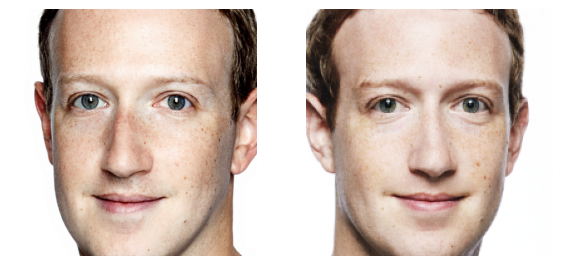

In [258]:
for idx, neighbour in enumerate(neighbours[0]):
    if neighbour < len(representations):
        neighbour_name = representations[neighbour][0]
        neighbour_img = DeepFace.extract_faces(
            img_path=f"../Belajar-DeepFace/{neighbour_name}",
            detector_backend=detector_backend
        )[0]["face"]
        
        print(f"{idx+1}th closest image in {len(embeddings)} database")
        fig = plt.figure(figsize=(7, 7))
        
        fig.add_subplot(1, 2, 1)
        plt.imshow(target_img)
        plt.axis("off")
        
        fig.add_subplot(1, 2, 2)
        plt.imshow(neighbour_img)
        plt.axis("off")
        
        plt.show()
    else:
        print(f"Index {neighbour} out of range for representations")



In [259]:
print(representations[neighbour][0])

img14.jpg
